# Load libraries


In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min, norm, geom, uniform, lognorm

In [2]:
# Set the root directory to be able to access other folders in the project

CURR_DIR = os.getcwd()  # current working directory
BASE_DIR = Path(CURR_DIR).parent  # parent directory
print(BASE_DIR)

/home/adrien/Documents/Github/MFA/02_stock_driven_and_surv_curves/tutorial_and_homework


# Import data


In [3]:
# Load input data, inflow-driven model:
# and check your data

file_path = BASE_DIR / "data" / "raw" / "MFA_II_tutorial_II.xlsx"
data = pd.read_excel(file_path, sheet_name="inflow_driven")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     61 non-null     int64  
 1   stock    0 non-null      float64
 2   inflow   61 non-null     int64  
 3   outflow  0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


In [4]:
# set the index to year
data = data.set_index(["year"])

years = data.index
end_year = years[-1]
print(f"end_year = {end_year}")

data

end_year = 2050


,stock,inflow,outflow
year,,,
1990,NaN,13,NaN
1991,NaN,14,NaN
1992,NaN,12,NaN
1993,NaN,10,NaN
1994,NaN,7,NaN
...,...,...,...
2046,NaN,66,NaN
2047,NaN,67,NaN
2048,NaN,70,NaN


In [5]:
step_max = data.shape[0]
timesteps = np.arange(0, step_max)
timesteps

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

# Create a survival curve

(if one wasn't supplied as input data)


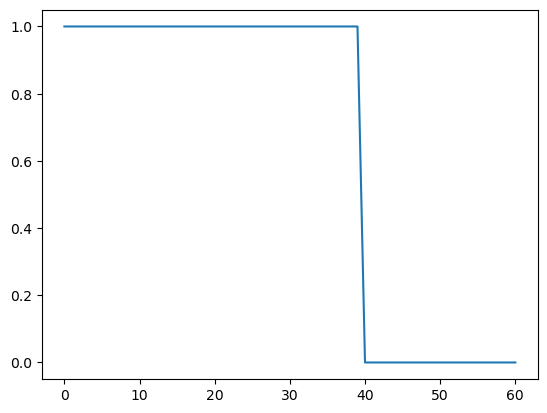

In [6]:
# Fixed lifetime survival curve

fixed_lifetime = 40
survival_curve = np.ones_like(timesteps)
survival_curve[fixed_lifetime:] = 0

plt.plot(survival_curve)
plt.show()

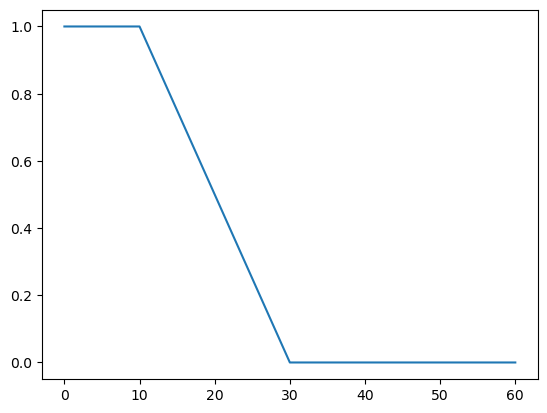

In [7]:
# Uniform distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform

uniform_dist = uniform(
    loc=10,  # shifts the curve along the x-axis (starting point)
    scale=20,  # controls the width (ending point)
)
survival_curve = uniform_dist.sf(timesteps)  # sf = survival function
plt.plot(survival_curve)
plt.show()

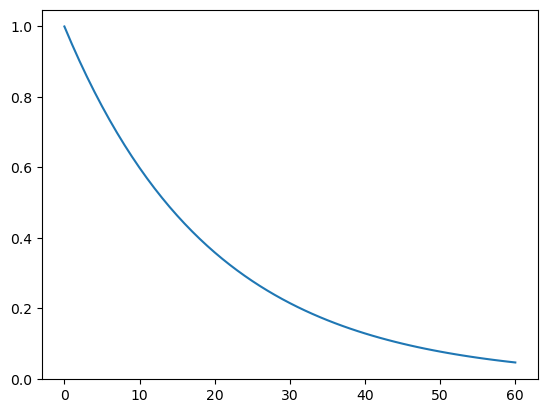

In [8]:
# Geometric distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom

geom_dist = geom(
    p=0.05,  # controls the depreciation rate
    loc=0,  # shifts the curve along the x-axis (starting point)
)
survival_curve = geom_dist.sf(timesteps)  # sf = survival function
plt.plot(survival_curve)
plt.show()

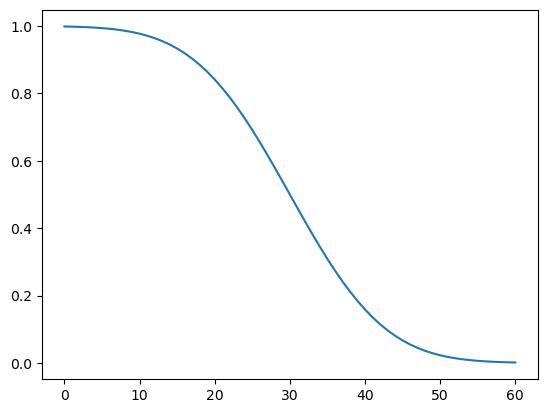

In [9]:
# Normal distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

norm_dist = norm(
    loc=30,  # shifts the center of the curve (mean point)
    scale=10,  # Controls the spread of the curve (standard deviation)
)
survival_curve = norm_dist.sf(timesteps)  # sf = survival function
plt.plot(survival_curve)
plt.show()

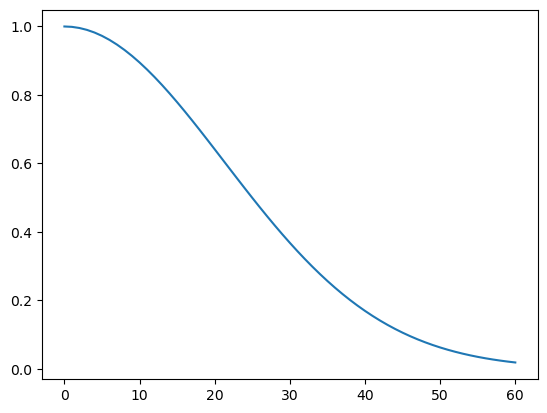

In [10]:
# Weibull distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

weibull_dist = weibull_min(
    c=2,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=30,  # Stretches or compresses the curve along the x-axis (spread)
)
survival_curve = weibull_dist.sf(timesteps)  # sf = survival function

plt.plot(survival_curve)
plt.show()

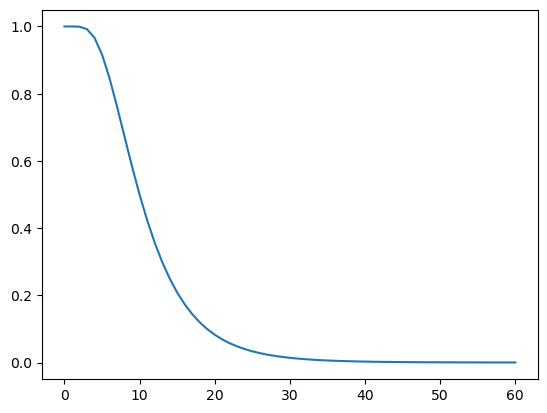

In [11]:
# Lognormal distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm

lognorm_dist = lognorm(
    s=0.5,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=10,  # controls the stretch of the distribution
)

survival_curve = lognorm_dist.sf(timesteps)  # sf = survival function

plt.plot(survival_curve)
plt.show()

# Create a survival curve matrix


In [12]:
# create survival curve matrix with placeholder zeros
survival_curve_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

![filling_survival_curve_matrix](../img/filling_survival_curve_matrix.png)


In [13]:
# populate the survival curve matrix with shifted curves, column by column using slices
for step in timesteps:
    # at each iteration, we take 1 year less of the survival curve
    last_idx = step_max - step
    values = survival_curve[0:last_idx]
    # and we assign the sliced values to the sliced matrix:
    # --> rows: from step to step_max
    # --> columns: only the current step
    survival_curve_matrix.loc[step:step_max, step] = values

survival_curve_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,0.000853,0.000984,...,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.0
57,0.000250,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,0.000853,...,0.846527,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.0
58,0.000219,0.000250,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,...,0.762185,0.846527,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.0
59,0.000193,0.000219,0.000250,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,...,0.672305,0.762185,0.846527,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.0


<Axes: >

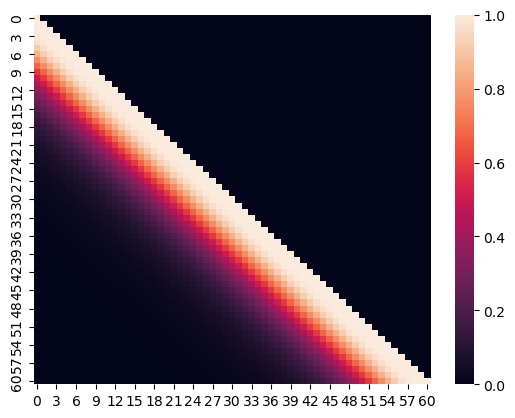

In [14]:
# visualize the survival curve matrix with a heatmap
sns.heatmap(survival_curve_matrix, annot=False)

# Going further


In [15]:
# Instead of a numpy array, we store the survival curve
# as a pandas Series with the appropriate index (= years)
sf = pd.Series(survival_curve, index=years)
sf

year
1990    1.000000
1991    0.999998
1992    0.999357
1993    0.991979
1994    0.966568
          ...   
2046    0.000285
2047    0.000250
2048    0.000219
2049    0.000193
2050    0.000169
Length: 61, dtype: float64

In [16]:
# create survival curve matrix with placeholder zeros (same as before)
survival_curve_matrix2 = pd.DataFrame(0, index=years, columns=years, dtype=float)

# populate the survival curve matrix with shifted curves, column by column using slices
# ! This time we use the years as index instead of the timesteps
for counter, year in enumerate(years):
    # at each iteration, we take 1 year less of the survival curve
    last_idx = end_year - counter
    values = sf.loc[:last_idx].values
    # and we assign the sliced values to the sliced matrix:
    # --> rows: from current year to the end year
    # --> columns: only the current year
    survival_curve_matrix2.loc[year:end_year, year] = values

# notice the names of the columns and rows
# are now years instead of timesteps
survival_curve_matrix2

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
year,,,,,,,,,,,,,,,,,,,,,
1990,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1991,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1992,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1993,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1994,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,0.000853,0.000984,...,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.0
2047,0.000250,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,0.000853,...,0.846527,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.0
2048,0.000219,0.000250,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,...,0.762185,0.846527,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.0


<Axes: xlabel='year', ylabel='year'>

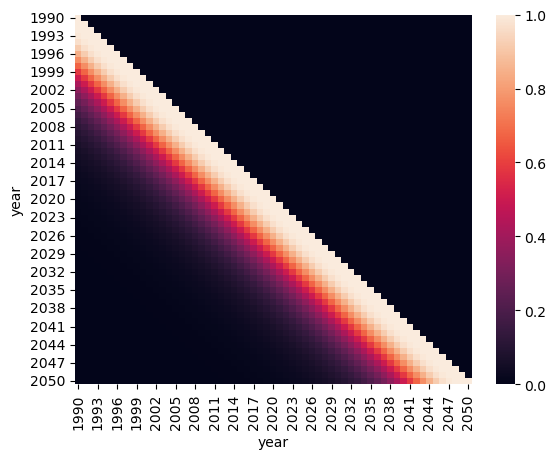

In [17]:
# visualize the cohort matrix with a heatmap
# notice the names of the columns and rows
# are now years instead of timesteps
sns.heatmap(survival_curve_matrix2, annot=False)

# More information and tips


- [Statistical functions in scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
- the `enumerate()` function on [W3school](https://www.w3schools.com/python/ref_func_enumerate.asp) or [Programiz](https://www.programiz.com/python-programming/methods/built-in/enumerate)
